- A dataset which contain some customers who are withdrawing their account from the bank due to some loss and other issues with the help this data we try to analyse and maintain accuracy.Tracking of bank customer churn rate through prediction will help in reducing marketing costs, lead to increase in capital ,expanding total customers and a lot more.¶

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('Bank Churn.csv')

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


- We can infer from this that there is No null value in our dataset.

In [81]:
#Dropping Irrelvant columns

In [14]:
df.drop(columns = ['RowNumber','CustomerId','Surname'], inplace = True)

# Data Visualization

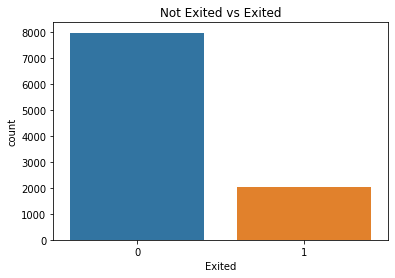

In [8]:
plt.title('Not Exited vs Exited')
sns.countplot(x = 'Exited',data = df)

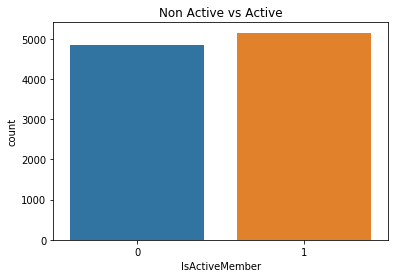

In [9]:
plt.title('Non Active vs Active')
sns.countplot(x = 'IsActiveMember', data = df)

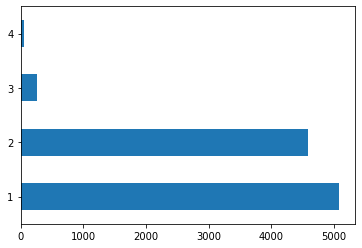

In [12]:
df['NumOfProducts'].value_counts().plot(kind = 'barh')

Text(0.5, 1.0, 'Countrywise - Exited vs Not Exited')

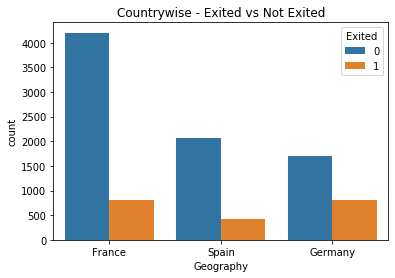

In [17]:
sns.countplot(x = 'Geography', hue = 'Exited', data = df).set_title('Countrywise - Exited vs Not Exited')

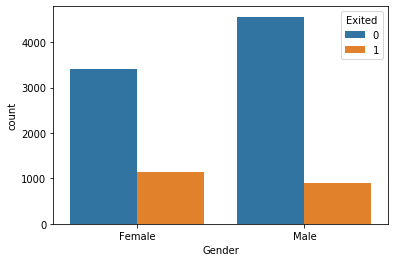

In [20]:
sns.countplot(x = 'Gender',hue = 'Exited', data = df)

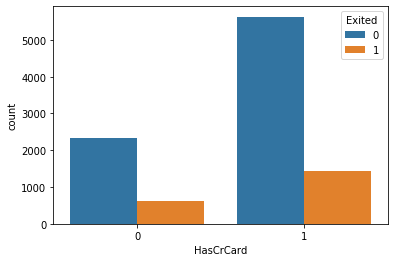

In [21]:
sns.countplot(x = 'HasCrCard',hue = 'Exited', data = df)

# Observations:-

- Total umber of customers who retained is highest from France and those who exited are highest from Germany,which means the bank needs to focus more on customers from Germany followed by France so that they don't churn.
- The proportion of female customers churning is greater than that of male customers.
- Suprisingly,coustomers who had credit card churned more which can be a coincidence.

In [22]:
df.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


In [82]:
# We would like to add features that are likely to have an impact on the probability of churning.

In [27]:
df['BalanceSalaryRatio'] = df['Balance']/ df['EstimatedSalary']

(-1, 5)

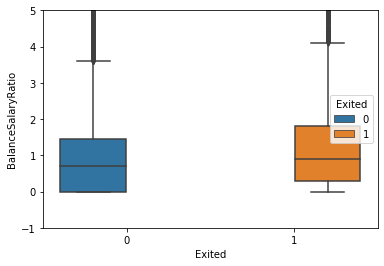

In [29]:
sns.boxplot(y='BalanceSalaryRatio',x = 'Exited', hue = 'Exited',data = df)
plt.ylim(-1,5)

(-0.2, 0.7)

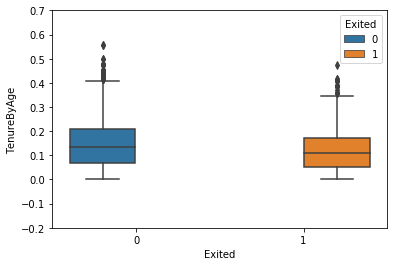

In [31]:
df['TenureByAge'] = df.Tenure/(df.Age)
sns.boxplot(y='TenureByAge',x = 'Exited', hue = 'Exited',data = df)
plt.ylim(-0.2, 0.7)

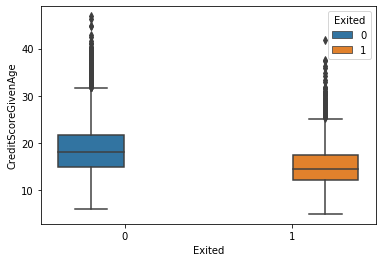

In [32]:
df['CreditScoreGivenAge'] = df.CreditScore/(df.Age)
sns.boxplot(y='CreditScoreGivenAge',x = 'Exited', hue = 'Exited',data = df)

In [33]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalancedSalaryRatio,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0.000000,0.000000,0.047619,14.738095
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0.744677,0.744677,0.024390,14.829268
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1.401375,1.401375,0.190476,11.952381
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0.000000,0.000000,0.025641,17.923077
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1.587055,1.587055,0.046512,19.767442


In [35]:
df.drop(columns = ['BalancedSalaryRatio'],inplace = True)

In [83]:
# Data Preperation for Model Fitting

In [38]:
continuous_vars = ['CreditScore',  'Age', 'Tenure', 'Balance','NumOfProducts', 'EstimatedSalary', 'BalanceSalaryRatio',
                   'TenureByAge','CreditScoreGivenAge']
categorical_vars = ['HasCrCard', 'IsActiveMember','Geography', 'Gender']

In [39]:
df = df[['Exited'] + continuous_vars + categorical_vars]

In [40]:
df.head()

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Geography,Gender
0,1,619,42,2,0.00,1,101348.88,0.000000,0.047619,14.738095,1,1,France,Female
1,0,608,41,1,83807.86,1,112542.58,0.744677,0.024390,14.829268,0,1,Spain,Female
2,1,502,42,8,159660.80,3,113931.57,1.401375,0.190476,11.952381,1,0,France,Female
3,0,699,39,1,0.00,2,93826.63,0.000000,0.025641,17.923077,0,0,France,Female
4,0,850,43,2,125510.82,1,79084.10,1.587055,0.046512,19.767442,1,1,Spain,Female


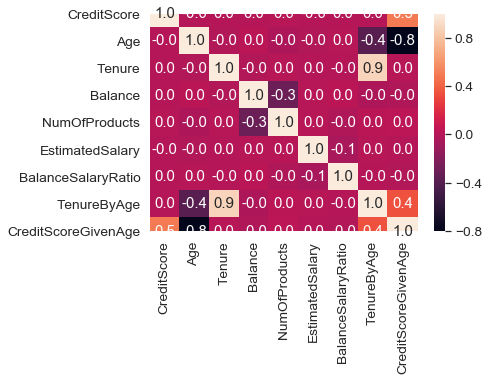

In [42]:
sns.set()
sns.set(font_scale = 1.25)
sns.heatmap(df[continuous_vars].corr(), annot = True,fmt = ".1f")

- We can see from the correlation matrix that only the columns which we have created have some significant correlation with columns they are made from.

In [43]:
df.loc[df.HasCrCard == 0, 'HasCrCard'] = -1
df.loc[df.IsActiveMember == 0, 'IsActiveMember'] = -1

# One-hot encoding categorical columns¶


In [45]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [46]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [47]:
from sklearn.preprocessing import LabelEncoder

In [49]:
le = LabelEncoder() 
df['Gender']= le.fit_transform(df['Gender']) 
df['Geography']= le.fit_transform(df['Geography'])

# Gender 0 = Female, 1 = Male
# Geography 0-France,1-Germany,2-Spain

In [50]:
df.head()

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Geography,Gender
0,1,619,42,2,0.00,1,101348.88,0.000000,0.047619,14.738095,1,1,0,0
1,0,608,41,1,83807.86,1,112542.58,0.744677,0.024390,14.829268,-1,1,2,0
2,1,502,42,8,159660.80,3,113931.57,1.401375,0.190476,11.952381,1,-1,0,0
3,0,699,39,1,0.00,2,93826.63,0.000000,0.025641,17.923077,-1,-1,0,0
4,0,850,43,2,125510.82,1,79084.10,1.587055,0.046512,19.767442,1,1,2,0


In [51]:
df1 = pd.get_dummies(data=df, columns=['Gender','Geography'])

In [52]:
df1

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Gender_0,Gender_1,Geography_0,Geography_1,Geography_2
0,1,619,42,2,0.00,1,101348.88,0.000000,0.047619,14.738095,1,1,1,0,1,0,0
1,0,608,41,1,83807.86,1,112542.58,0.744677,0.024390,14.829268,-1,1,1,0,0,0,1
2,1,502,42,8,159660.80,3,113931.57,1.401375,0.190476,11.952381,1,-1,1,0,1,0,0
3,0,699,39,1,0.00,2,93826.63,0.000000,0.025641,17.923077,-1,-1,1,0,1,0,0
4,0,850,43,2,125510.82,1,79084.10,1.587055,0.046512,19.767442,1,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,771,39,5,0.00,2,96270.64,0.000000,0.128205,19.769231,1,-1,0,1,1,0,0
9996,0,516,35,10,57369.61,1,101699.77,0.564108,0.285714,14.742857,1,1,0,1,1,0,0
9997,1,709,36,7,0.00,1,42085.58,0.000000,0.194444,19.694444,-1,1,1,0,1,0,0
9998,1,772,42,3,75075.31,2,92888.52,0.808230,0.071429,18.380952,1,-1,0,1,0,1,0


# Scaling the continuous attributes using MinMaxScaler


In [53]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1[continuous_vars] = scaler.fit_transform(df1[continuous_vars])

In [54]:
df.head()

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Geography,Gender
0,1,619,42,2,0.00,1,101348.88,0.000000,0.047619,14.738095,1,1,0,0
1,0,608,41,1,83807.86,1,112542.58,0.744677,0.024390,14.829268,-1,1,2,0
2,1,502,42,8,159660.80,3,113931.57,1.401375,0.190476,11.952381,1,-1,0,0
3,0,699,39,1,0.00,2,93826.63,0.000000,0.025641,17.923077,-1,-1,0,0
4,0,850,43,2,125510.82,1,79084.10,1.587055,0.046512,19.767442,1,1,2,0


In [55]:
for col in df1:
    print(f'{col}: {df1[col].unique()}')

Exited: [1 0]
CreditScore: [0.538 0.516 0.304 0.698 1.    0.59  0.944 0.052 0.302 0.668 0.356 0.294
 0.252 0.398 0.57  0.532 0.606 0.474 0.752 0.764 0.572 0.32  0.638 0.992
 0.454 0.812 0.442 0.448 0.122 0.482 0.366 0.406 0.34  0.744 0.25  0.28
 0.908 0.464 0.244 0.23  0.412 0.968 0.62  0.852 0.958 0.574 0.4   0.696
 0.47  0.876 0.61  0.502 0.612 0.75  0.322 0.528 0.784 0.674 0.41  0.506
 0.802 0.462 0.77  0.622 0.65  0.776 0.926 0.614 0.508 0.338 0.628 0.656
 0.814 0.132 0.63  0.854 0.386 0.312 0.286 0.604 0.8   0.758 0.592 0.594
 0.916 0.348 0.838 0.76  0.33  0.846 0.928 0.72  0.126 0.546 0.64  0.544
 0.87  0.51  0.258 0.67  0.376 0.424 0.742 0.556 0.636 0.956 0.648 0.55
 0.164 0.84  0.816 0.89  0.672 0.878 0.478 0.222 0.468 0.458 0.626 0.664
 0.886 0.682 0.27  0.6   0.808 0.37  0.732 0.378 0.712 0.472 0.562 0.734
 0.9   0.666 0.708 0.53  0.634 0.268 0.26  0.456 0.324 0.512 0.494 0.856
 0.328 0.35  0.73  0.46  0.914 0.342 0.818 0.332 0.722 0.536 0.586 0.642
 0.678 0.54  0.652 0.444 0

# Model Fitting & Selection

- As this is a Classification problem, we will use 3 models to predict the accuracy:
    1. Logistic Regression
    2. Support Vector Machine
    3. Random Forest Classifier

In [56]:
X = df1.drop('Exited',axis='columns')
y = df1['Exited']

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [58]:
X_train.shape

(8000, 16)

In [59]:
from sklearn.linear_model import LogisticRegression

In [60]:
log_primal = LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,intercept_scaling=1, max_iter=250, multi_class='auto',n_jobs=None, 
                                penalty='l2', random_state=None, solver='lbfgs',tol=1e-05, verbose=0, warm_start=False)

In [61]:
log_primal.fit(X_train,y_train)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=250,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=1e-05, verbose=0,
                   warm_start=False)

In [62]:
log_primal.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [64]:
from sklearn.metrics import classification_report

In [65]:
print(classification_report(y_train, log_primal.predict(X_train)))

              precision    recall  f1-score   support

           0       0.83      0.97      0.89      6368
           1       0.64      0.23      0.34      1632

    accuracy                           0.82      8000
   macro avg       0.74      0.60      0.62      8000
weighted avg       0.79      0.82      0.78      8000



# Support Vector Machine Algorithm

In [67]:
from sklearn.svm import SVC

In [68]:
SVM_RBF = SVC(C=150, cache_size=200, class_weight=None, coef0=0.0, decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf', max_iter=-1, probability=True, 
              random_state=None, shrinking=True,tol=0.001, verbose=False)

In [69]:
SVM_RBF.fit(X_train,y_train)

SVC(C=150, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [70]:
SVM_RBF.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [72]:
print(classification_report(y_train, SVM_RBF.predict(X_train)))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      6368
           1       0.83      0.41      0.55      1632

    accuracy                           0.86      8000
   macro avg       0.85      0.69      0.73      8000
weighted avg       0.86      0.86      0.84      8000



# Random Forest Classifier

In [73]:
from sklearn.ensemble import RandomForestClassifier

In [74]:
RF = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',max_depth=8, max_features=7, max_leaf_nodes=None,min_impurity_decrease=0.0,
                            min_impurity_split=None,min_samples_leaf=1, min_samples_split=3,min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
                            oob_score=False, random_state=None, verbose=0,warm_start=False)

In [75]:
RF.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=8, max_features=7, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [76]:
RF.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [77]:
print(classification_report(y_train,RF.predict(X_train)))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      6368
           1       0.88      0.52      0.65      1632

    accuracy                           0.89      8000
   macro avg       0.88      0.75      0.79      8000
weighted avg       0.89      0.89      0.88      8000



# Observation:

- Clearly Random Forest is giving the best training data acuracy of 89% for our dataset.
- Checking accuracy for test data with Random Forest


In [80]:
print(classification_report(y_test,  RF.predict(X_test)))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1595
           1       0.75      0.44      0.55       405

    accuracy                           0.86      2000
   macro avg       0.81      0.70      0.73      2000
weighted avg       0.85      0.86      0.84      2000



# Final accuracy for the test data is coming to be 86 % which is quite good.